In [4]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("../pitchfork-data/pitchfork.db")
df = pd.read_sql_query("select * from reviews;", conn)
df_years = pd.read_sql_query("select * from years;", conn)
df_genres = pd.read_sql_query("select * from genres", conn)
df_reviews = pd.read_sql_query("select * from content", conn)

In [2]:
cd pitchfork-data/

/Users/andrewbashford/pitchfork-data


In [3]:
ls

notebooks/                      readme.md
pitchfork-data.sublime-project  scrape/
pitchfork.db                    scrape.results.db


In [5]:
df[df['artist'] == 'the flaming lips']

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
1207,5929d953d7a71d1ea5699aad,oczy mlody,the flaming lips,https://pitchfork.com/reviews/albums/22769-ocz...,6.2,0,stuart berman,None,2017-01-18,2,18,1,2017
2586,5929dd6f0c2bba1b7de0261b,heady nuggs: 20 years after clouds taste metallic,the flaming lips,https://pitchfork.com/reviews/albums/21279-hea...,9.1,1,stuart berman,None,2015-11-24,1,24,11,2015
3818,5929e1450c2bba1b7de02a2b,with a little help from my fwends,the flaming lips,https://pitchfork.com/reviews/albums/19862-the...,5.5,0,stuart berman,None,2014-10-27,0,27,10,2014
4973,5929e4af13d197565213d7dd,peace sword ep,the flaming lips,https://pitchfork.com/reviews/albums/18677-the...,7.3,0,stuart berman,None,2013-10-30,2,30,10,2013
5693,5929e6b4c0084474cd0c50c0,the terror,the flaming lips,https://pitchfork.com/reviews/albums/17804-the...,7.8,0,stuart berman,None,2013-04-04,3,4,4,2013
6818,5929d9fec0084474cd0c44fd,the flaming lips and heady fwends,the flaming lips,https://pitchfork.com/reviews/albums/16522-the...,8.2,0,stuart berman,None,2012-04-20,4,20,4,2012
9758,5929e1b25e6ef95969325083,embryonic,the flaming lips,https://pitchfork.com/reviews/albums/13522-emb...,9.0,1,stuart berman,None,2009-10-12,0,12,10,2009
10719,5929e4305e6ef959693252e2,christmas on mars,the flaming lips,https://pitchfork.com/reviews/albums/12515-chr...,7.1,0,stuart berman,None,2008-12-12,4,12,12,2008
12446,5929da22d7a71d1ea5699b78,ufos at the zoo: the legendary concert in okla...,the flaming lips,https://pitchfork.com/reviews/albums/10437-ufo...,8.0,0,stephen m. deusner,None,2007-07-17,1,17,7,2007
13948,5929ddf913d197565213d127,20 years of weird: flaming lips 1986-2006,the flaming lips,https://pitchfork.com/reviews/albums/3088-20-y...,6.0,0,matt lemay,None,2006-04-16,6,16,4,2006


In [6]:
df = df.merge(df_years).reset_index()
df = df.merge(df_genres).reset_index()
df.year.fillna(value=df.pub_year, inplace=True)
df.drop_duplicates('reviewid',inplace=True)
df.drop(['level_0', 'index'], axis=1, inplace=True)
df.year = df.year.astype(int)

In [7]:
df.sort_values('pub_date', ascending=False)
df.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,genre
0,5a4d3a900c1ab40a8ff8840b,exposure,esperanza spalding,https://pitchfork.com/reviews/albums/esperanza...,7.7,0,seth colter walls,None,2018-01-06,5,6,1,2018,2017,jazz
1,5a3aac04dea49a0a938ccb1a,urge to merge,birthing hips,https://pitchfork.com/reviews/albums/birthing-...,7.0,0,zoe camp,None,2018-01-06,5,6,1,2018,2017,rock
2,5a3aaf4b2e04620b7f1a4e72,water memory,emily a. sprague,https://pitchfork.com/reviews/albums/emily-a-s...,7.6,0,philip sherburne,None,2018-01-06,5,6,1,2018,2017,electronic
3,5a4bcf157b99d20aa3c4a2ed,post-,jeff rosenstock,https://pitchfork.com/reviews/albums/jeff-rose...,8.2,0,ian cohen,None,2018-01-05,4,5,1,2018,2018,rock
4,5a4bcfa5dea49a0a938ccefd,cold devil,drakeo the ruler,https://pitchfork.com/reviews/albums/drakeo-th...,7.9,0,paul a. thompson,None,2018-01-05,4,5,1,2018,2018,rap


In [8]:
df['num_years_since_release'] = df.pub_year - df.year

jk;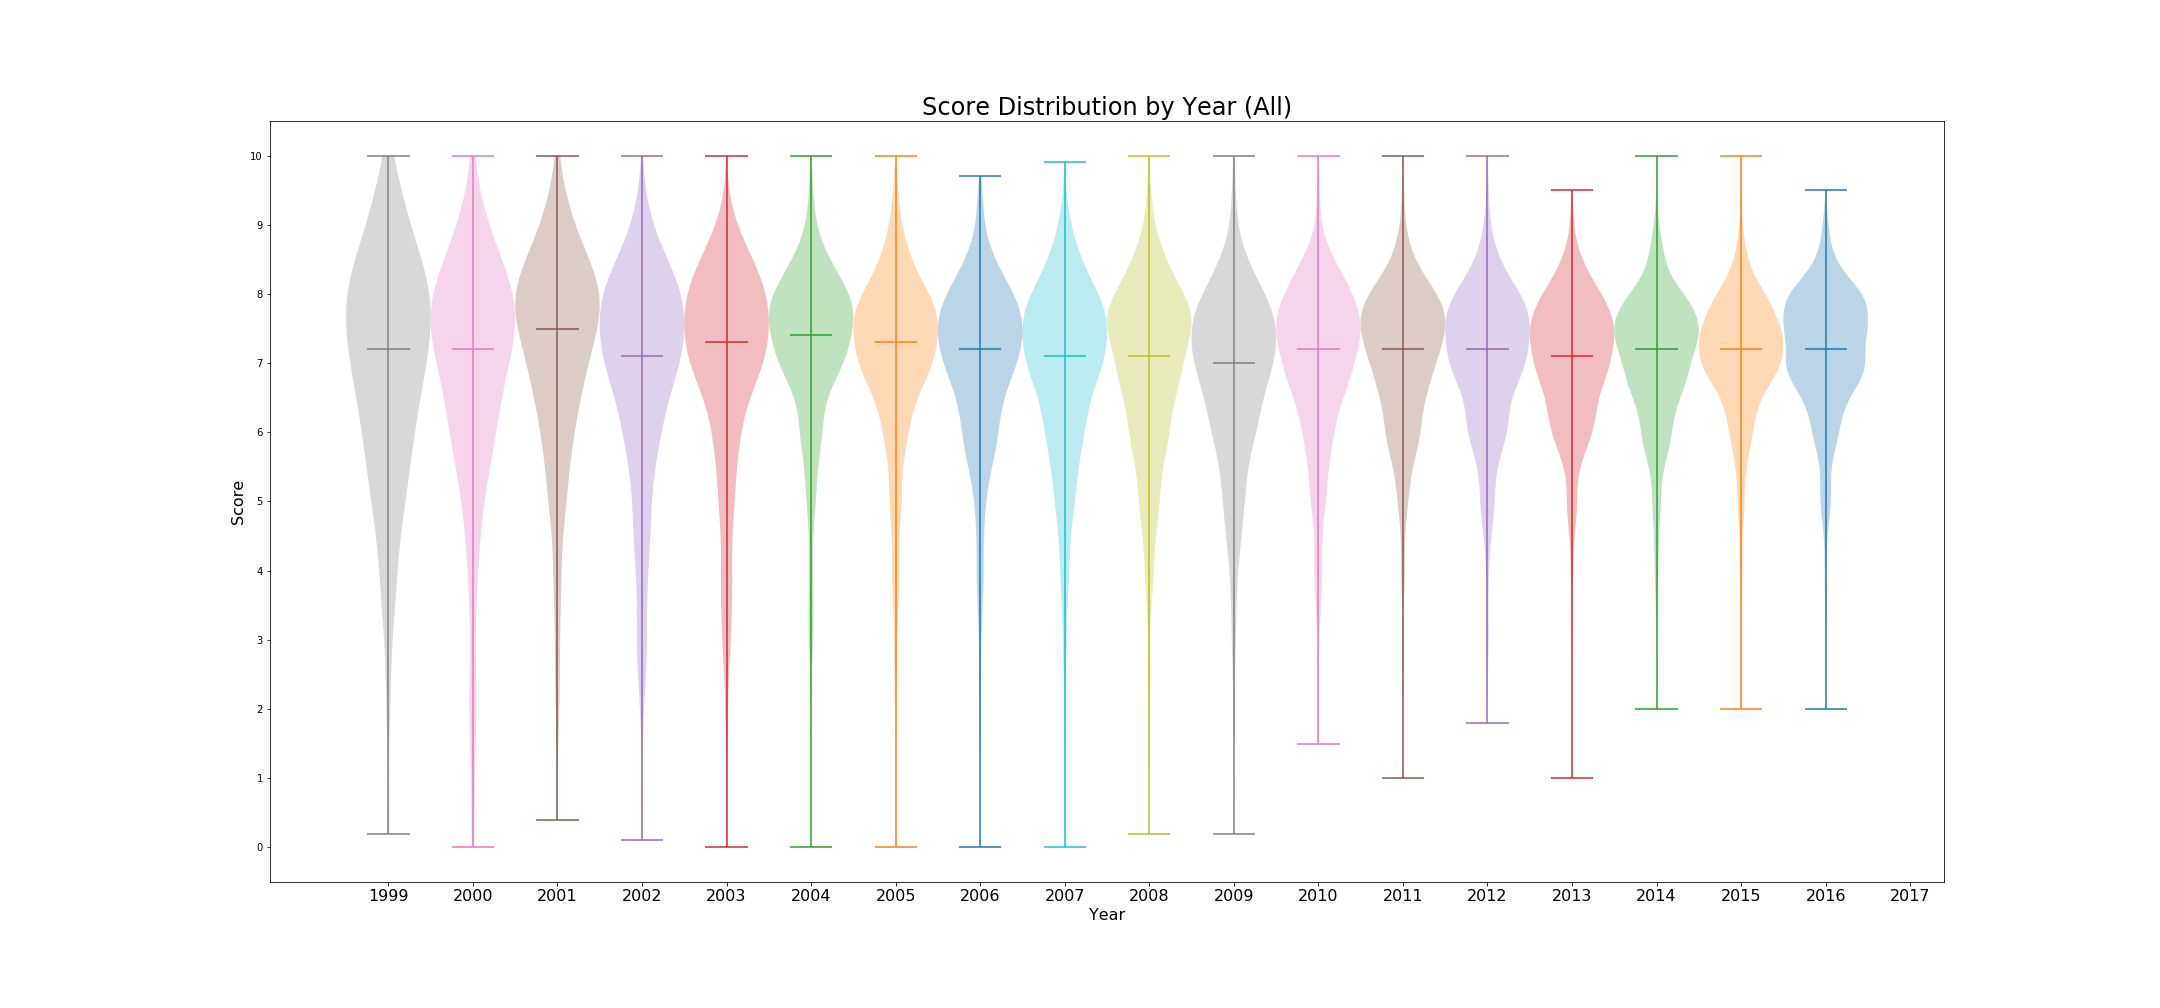

In [9]:
df = df[df.num_years_since_release <= 1]

In [10]:
by_year = df.groupby('pub_year')

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
years = list(df.pub_year.unique())

In [13]:
score_dist = {1999: [],}
for score,year in zip(df.score.astype(list), df.pub_year.astype(list)):
    if year not in score_dist.keys():
        score_dist[year] = []
    else:
        score_dist[year] = score_dist[year] + [score]
   

In [14]:
df['score_binned'] = pd.cut(df['score'], 5, labels=[1,2,3,4,5])

In [15]:
df['score_binned'].value_counts().sort_values()

1      101
2      571
5     2677
3     2854
4    12550
Name: score_binned, dtype: int64

{u'bodies': [<matplotlib.collections.PolyCollection at 0x11561ad10>],
 u'cbars': <matplotlib.collections.LineCollection at 0x11577d250>,
 u'cmaxes': <matplotlib.collections.LineCollection at 0x11562f7d0>,
 u'cmeans': <matplotlib.collections.LineCollection at 0x11561ab90>,
 u'cmins': <matplotlib.collections.LineCollection at 0x11562fd10>}

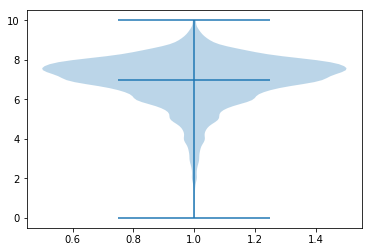

In [16]:
import numpy as np
plt.violinplot(np.array(df['score']), [1], widths=1, showmeans=True)


In [27]:
def plot_violins(df, genre):
    years = list(df.pub_year.unique())
    score_dist = {1999: [],}
    for score,year in zip(df.score.astype(list), df.pub_year.astype(list)):
        if year not in score_dist.keys():
            score_dist[year] = []
        else:
            score_dist[year] = score_dist[year] + [score]

    plt.figure(figsize=(30,14))
    plt.hlines(6, 1998, 2018, linestyles='dashed')
    plt.hlines(7, 1998, 2018, linestyles='dashed')
    plt.hlines(8, 1998, 2018, linestyles='dashed')
    for each in years:
        plt.xticks(years, fontsize=16)
        plt.yticks(range(0,11))
        if each == 2018:
            continue
        plt.violinplot(np.array(score_dist[each]), [each], widths=1,showmedians=True,showextrema=True)
    plt.title('Score Distribution by Year ({})'.format(genre), fontsize=24)
    plt.ylabel('Score', fontsize=16)
    plt.xlabel('Year', fontsize=16)
    plt.show()
#     plt.savefig('images/{}.png'.format(genre[:3]))

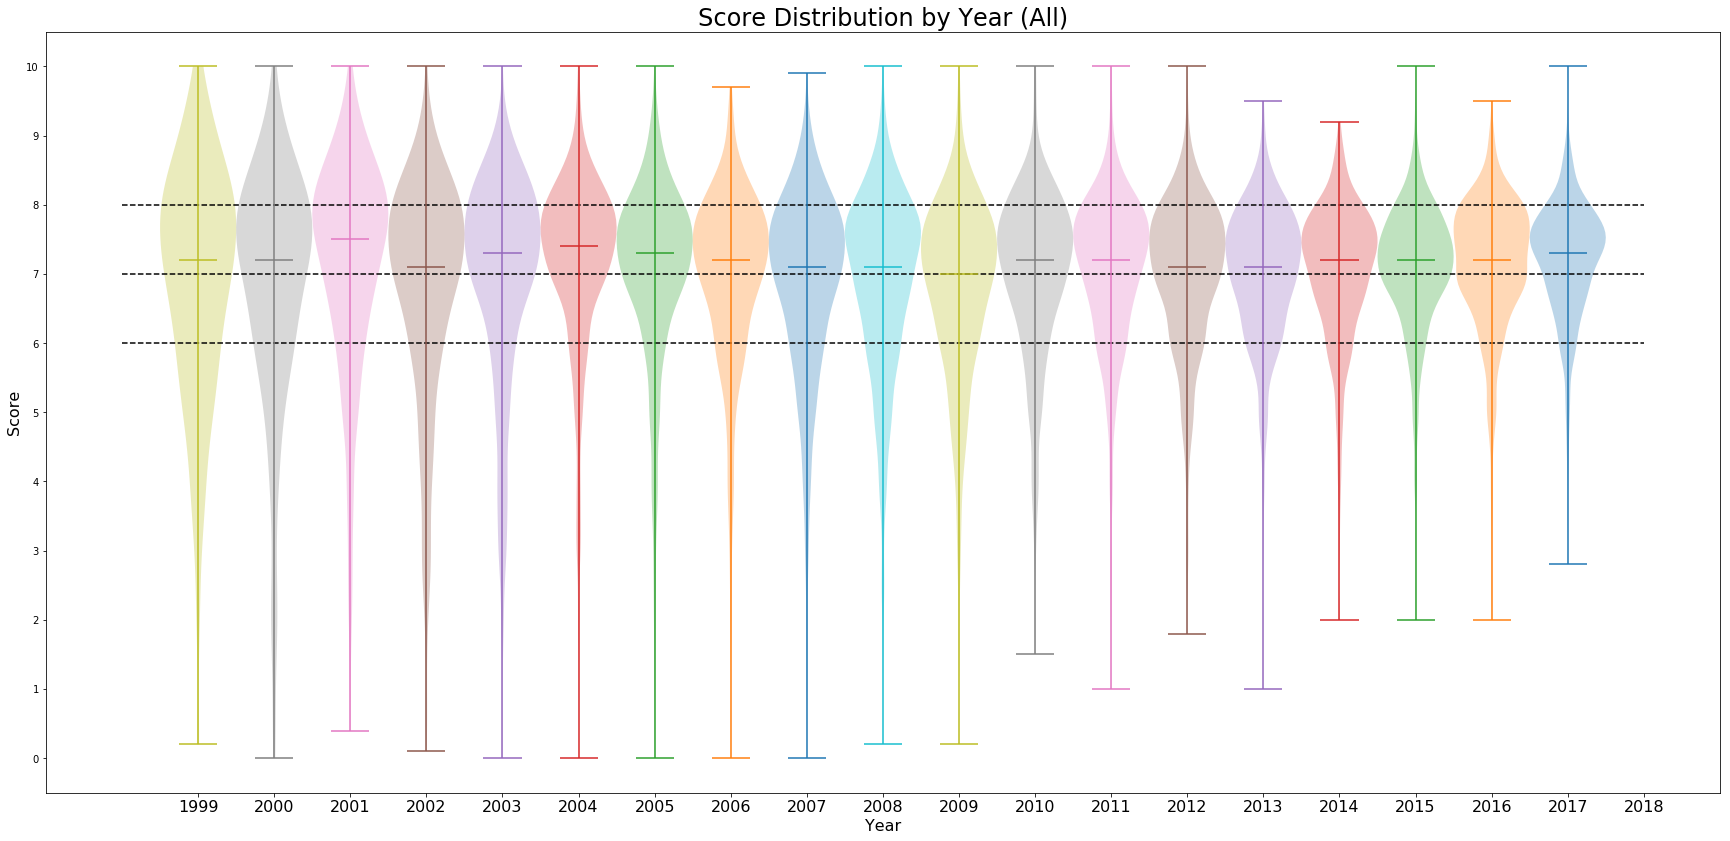

In [28]:
plot_violins(df, "All")

In [30]:
genres = list(df['genre'].unique())
genres = [u'metal',
 u'rock',
 u'electronic',
 u'rap',
 u'experimental',
 u'folk/country',
 u'jazz',
 u'pop/r&b',
 u'global']

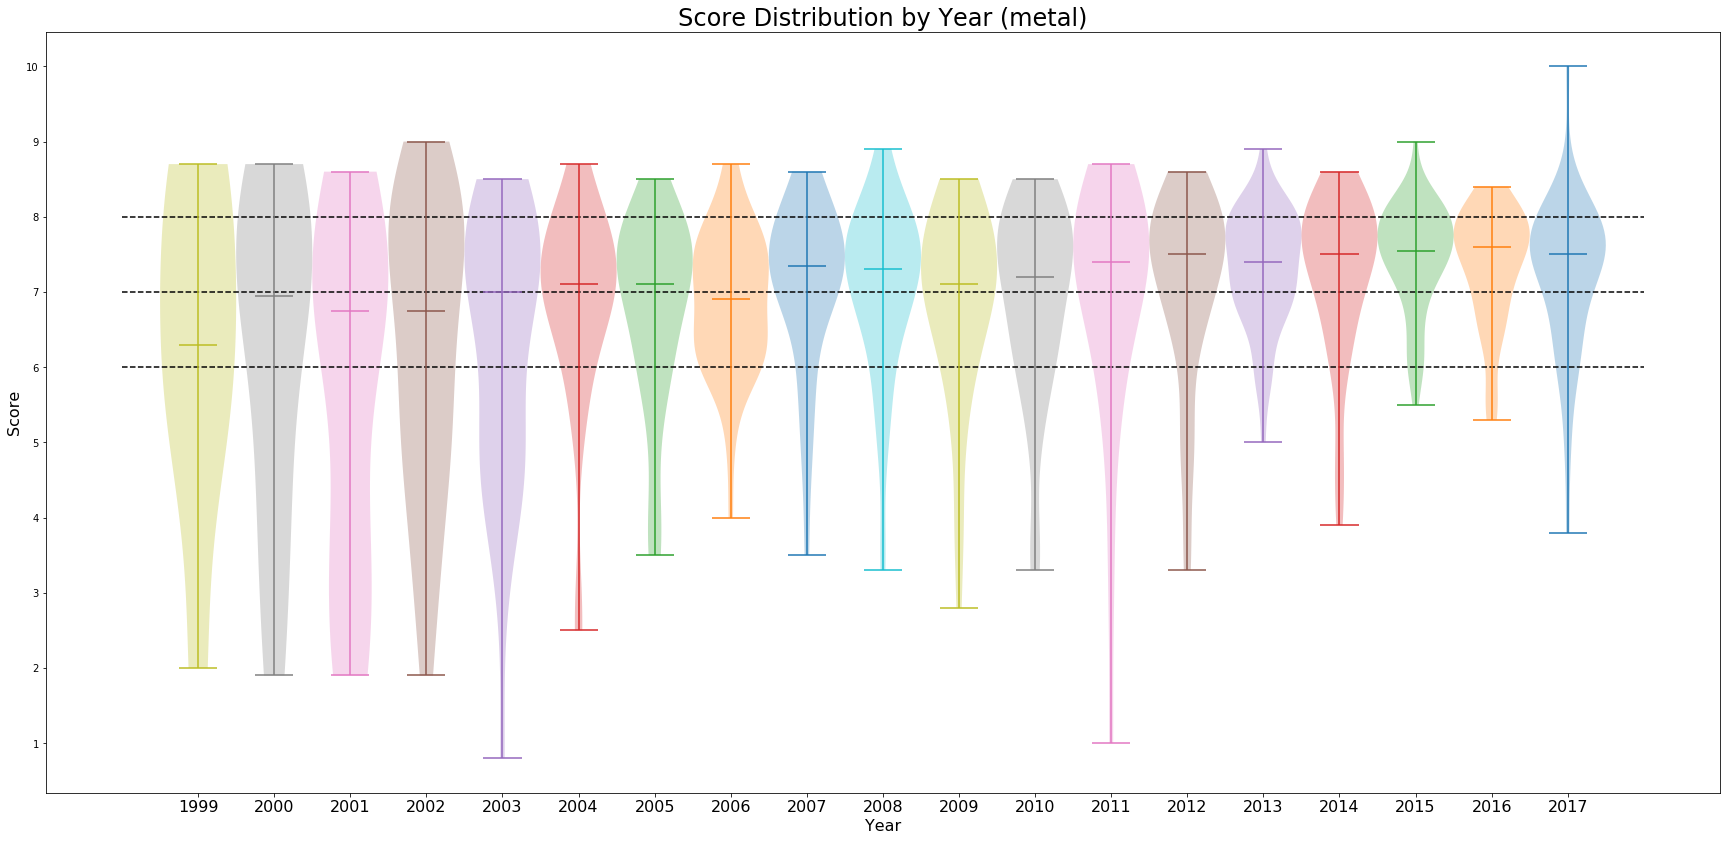

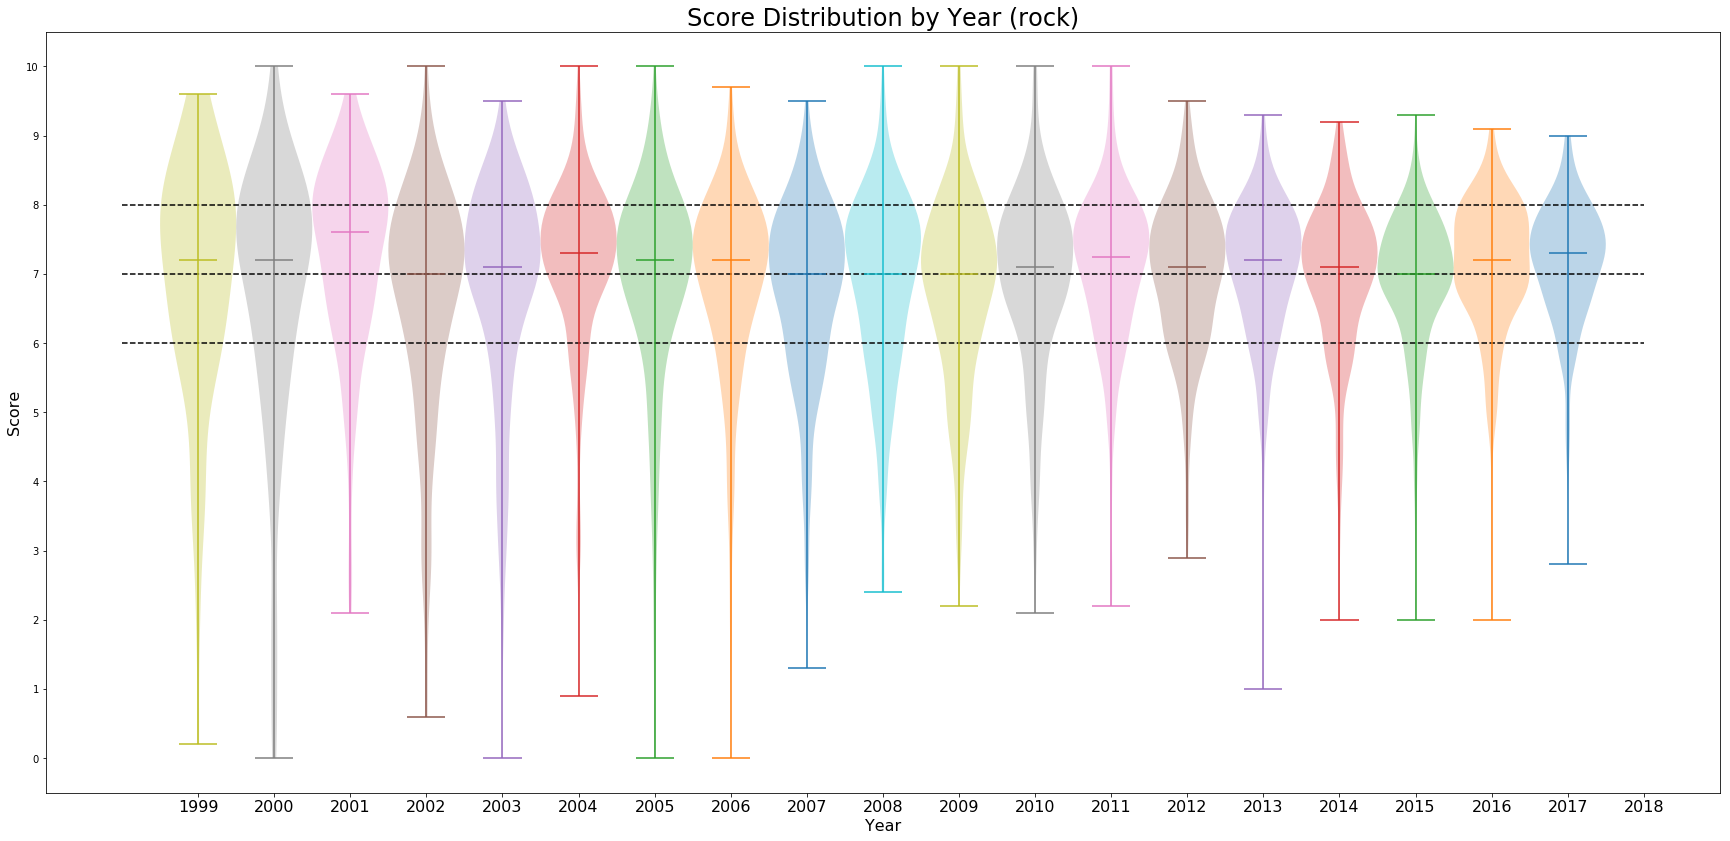

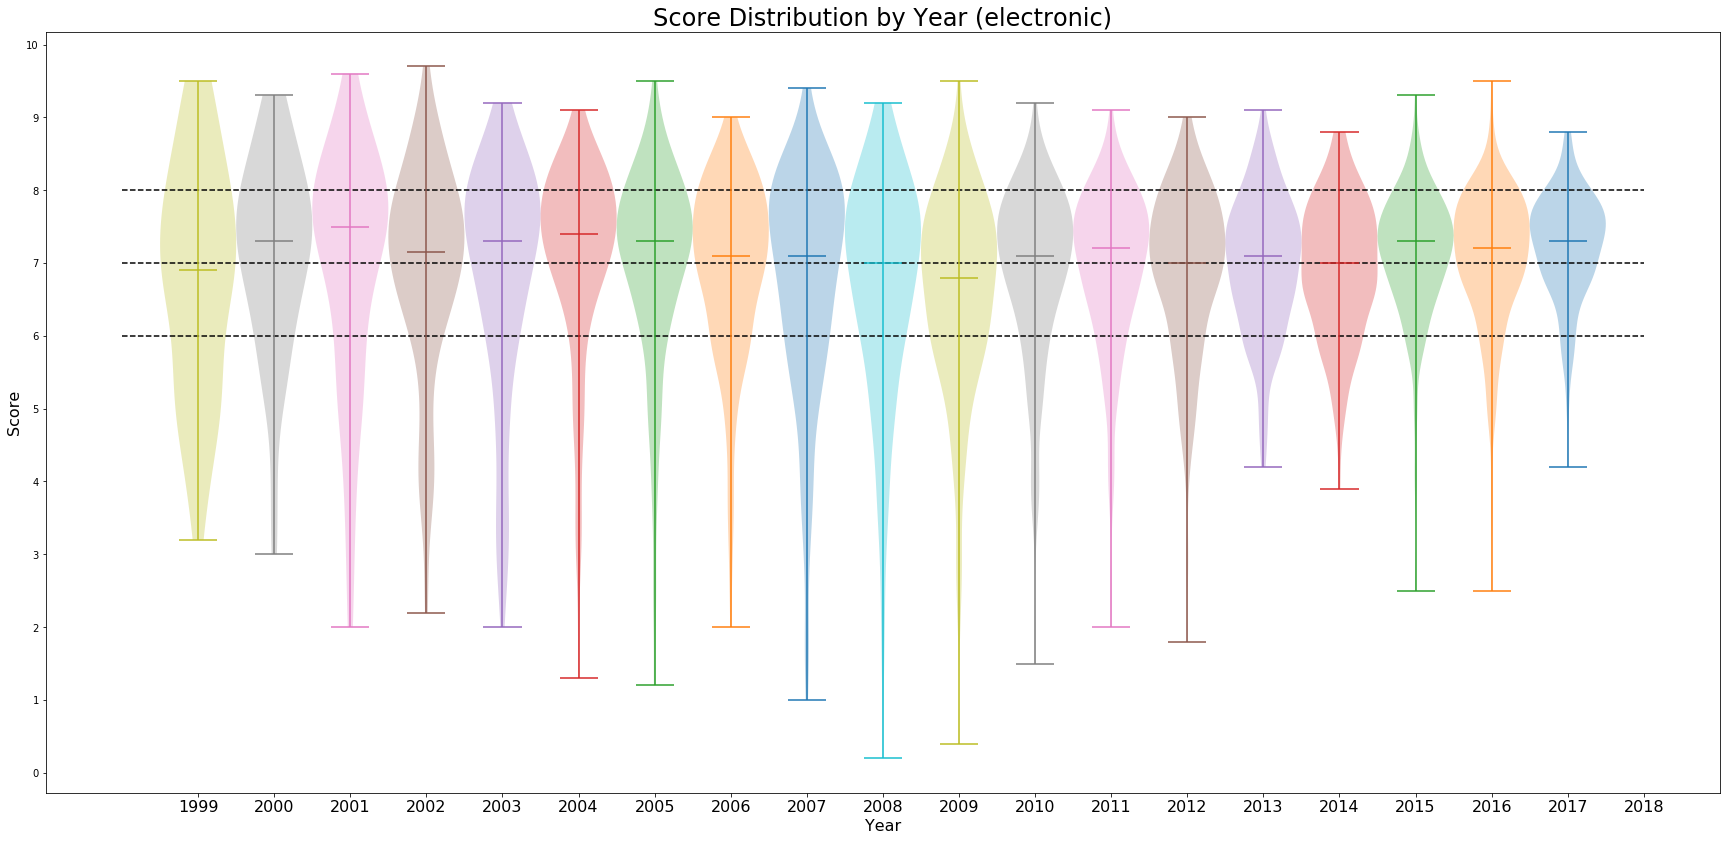

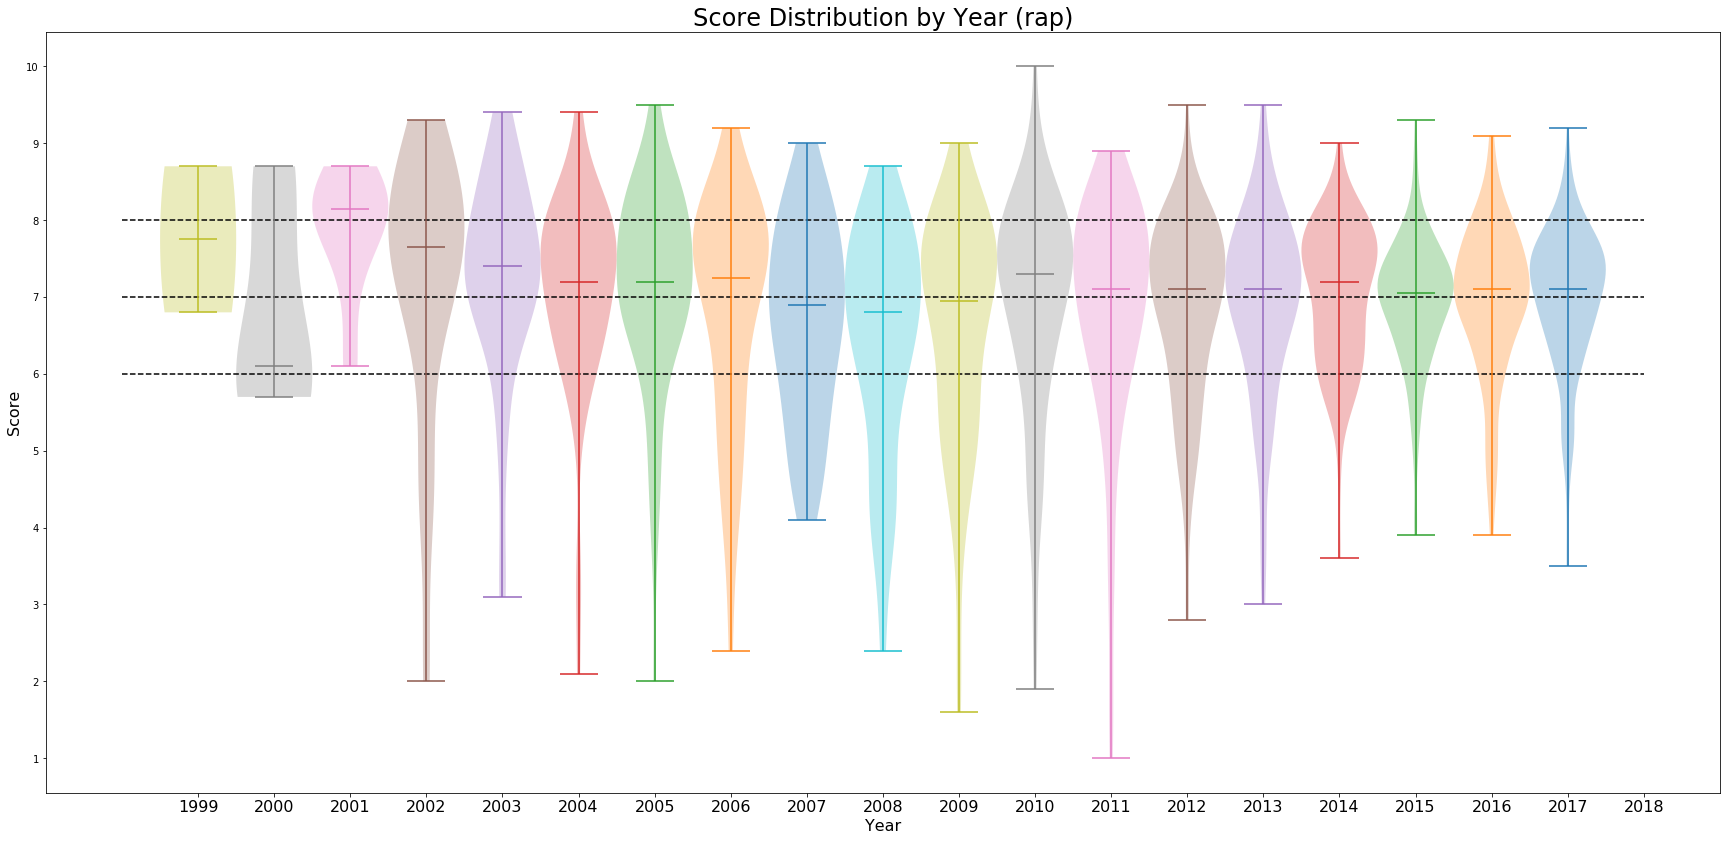

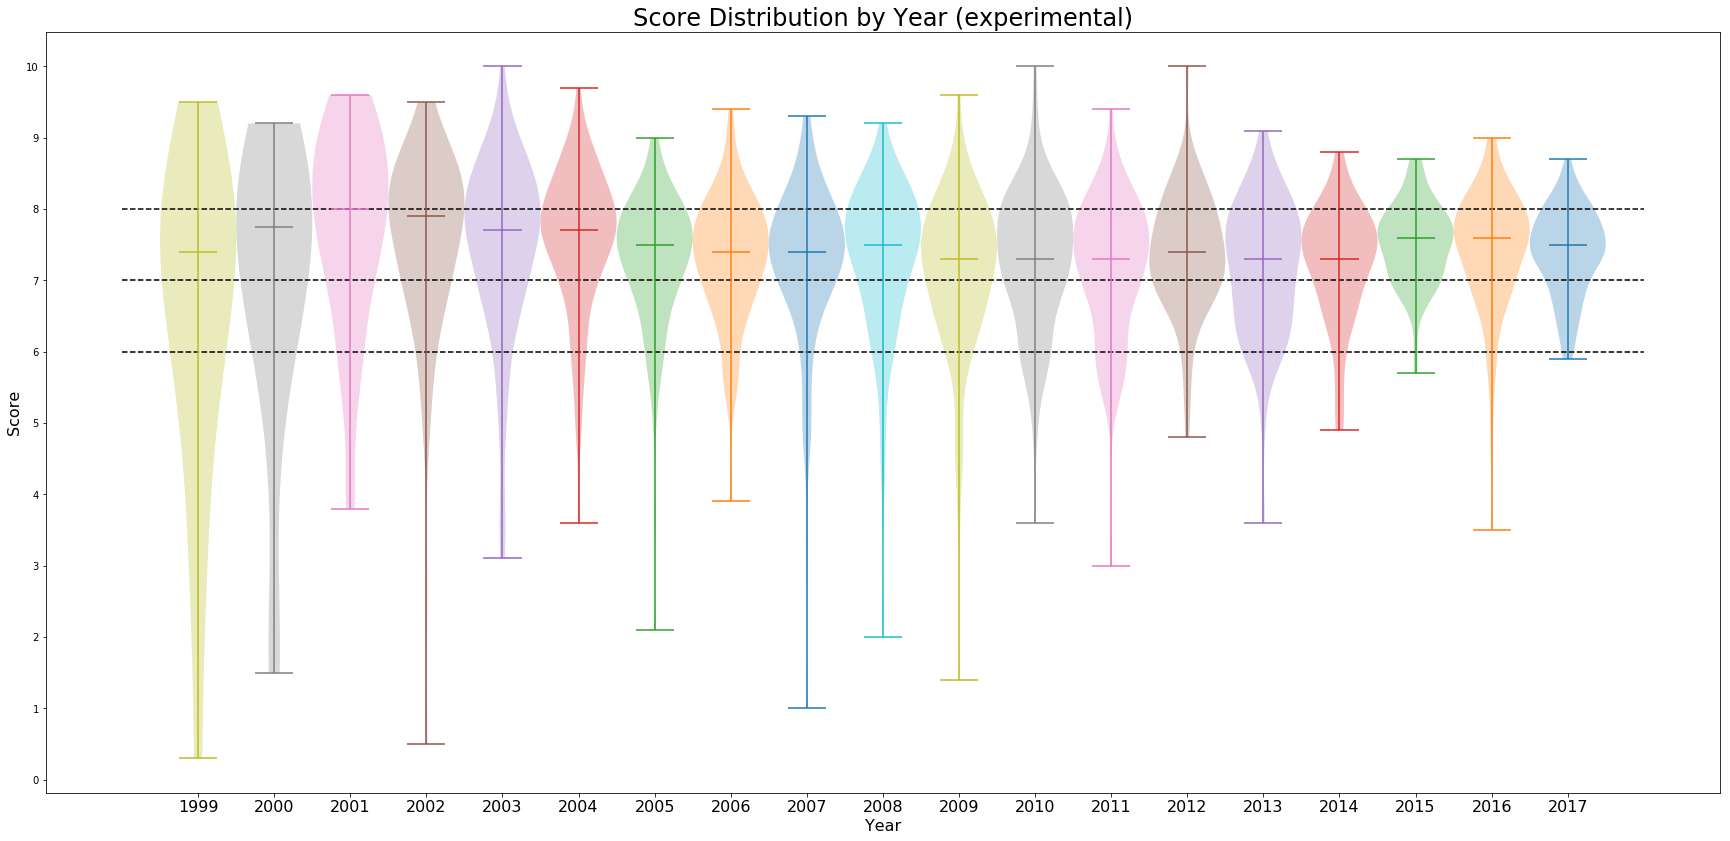

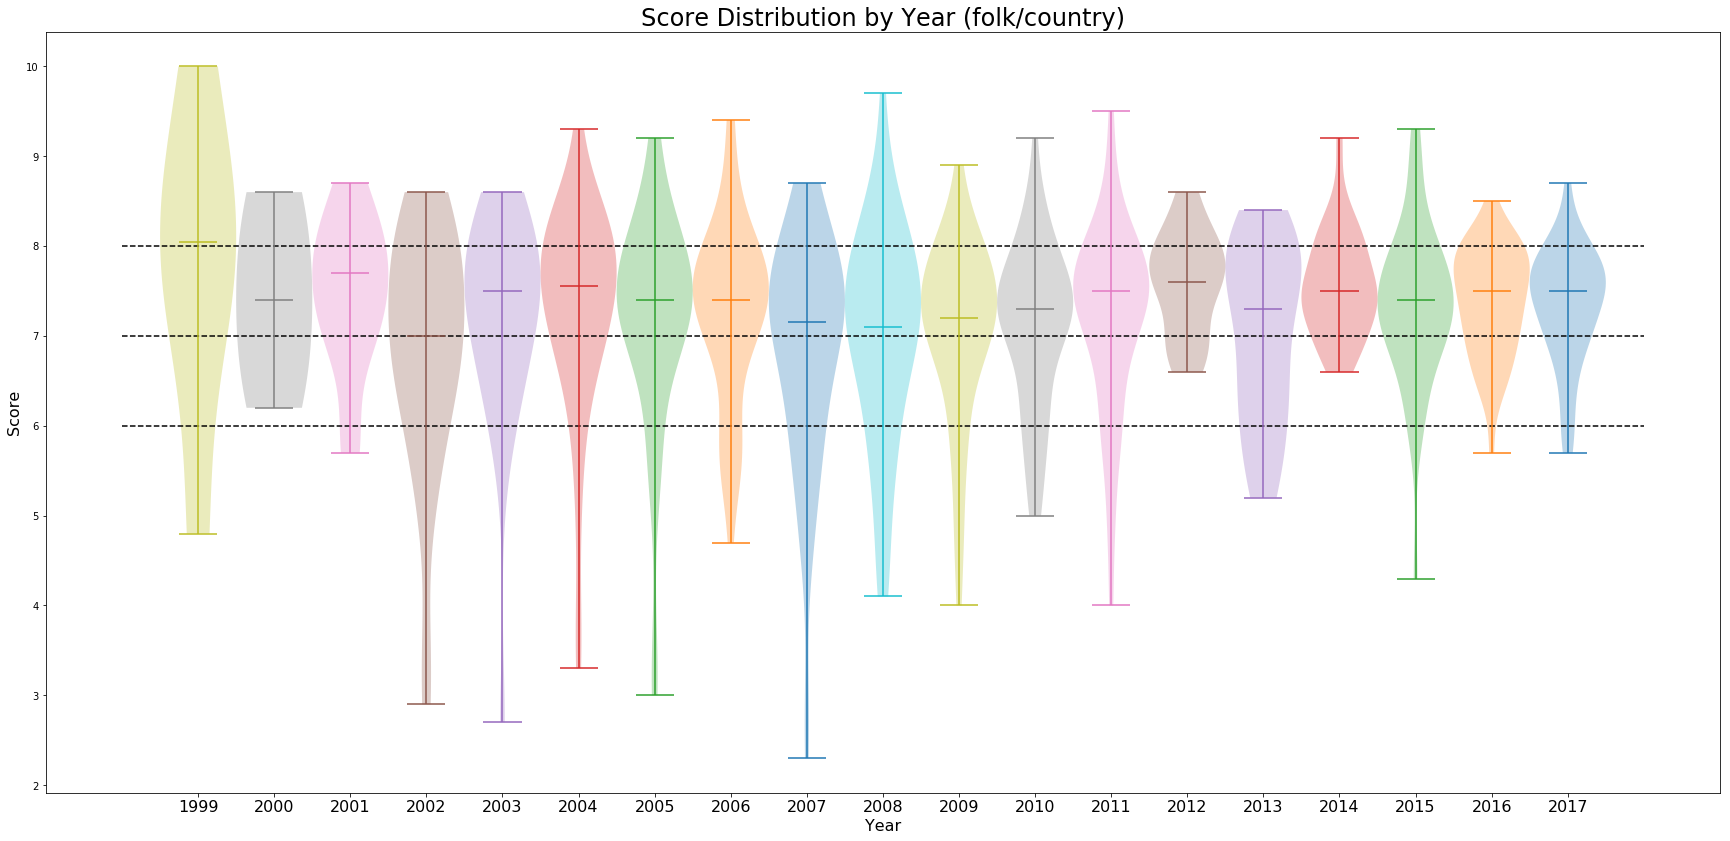

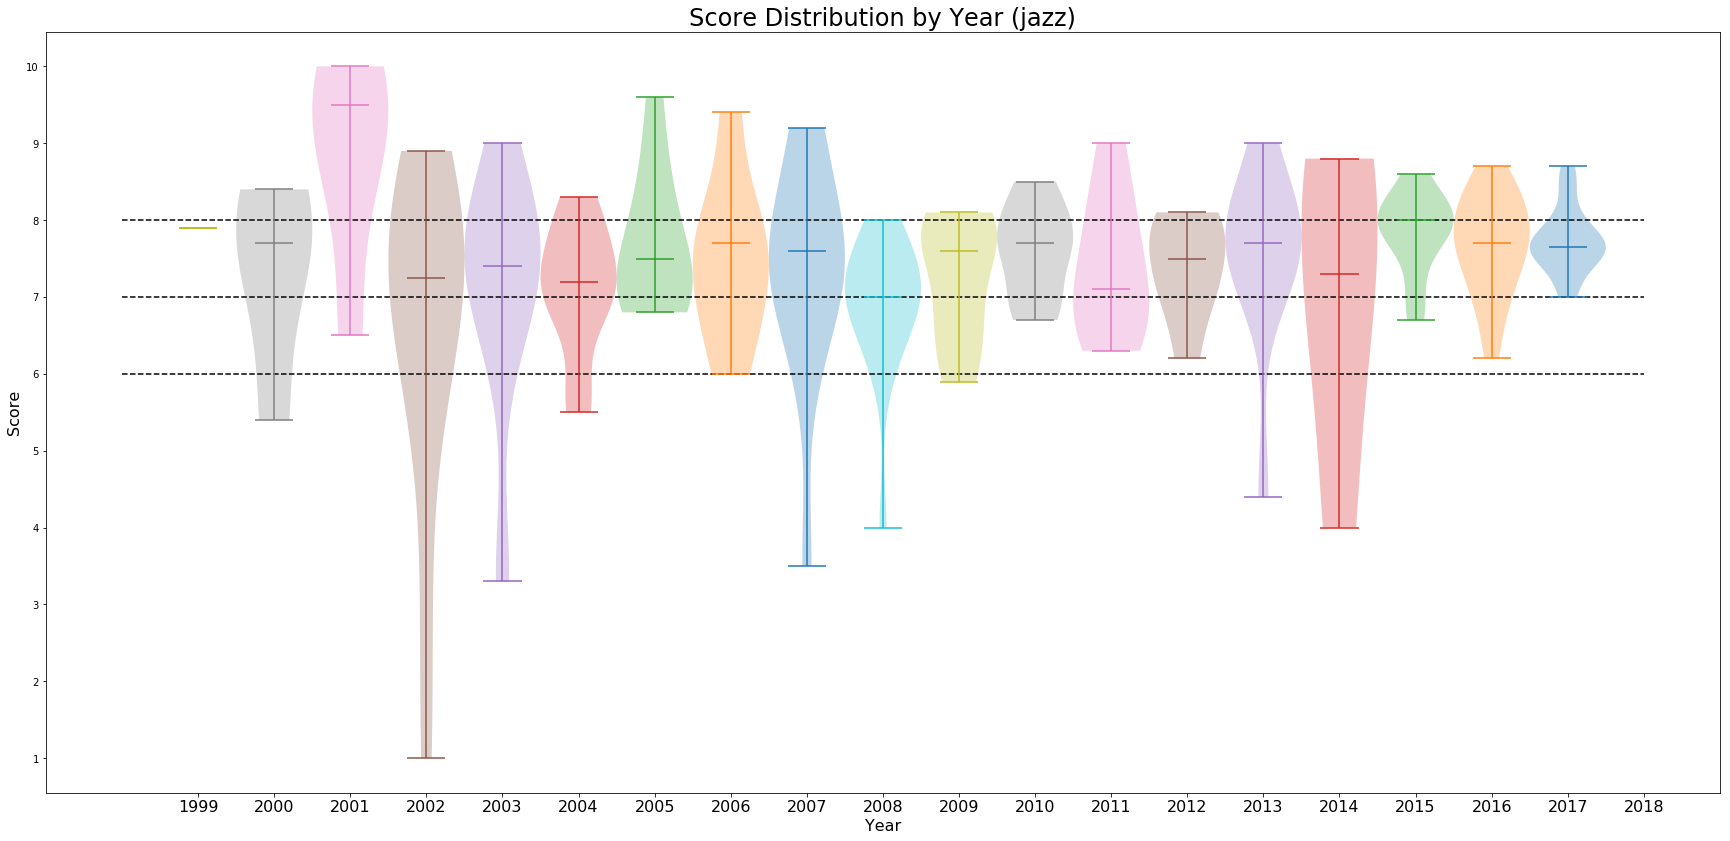

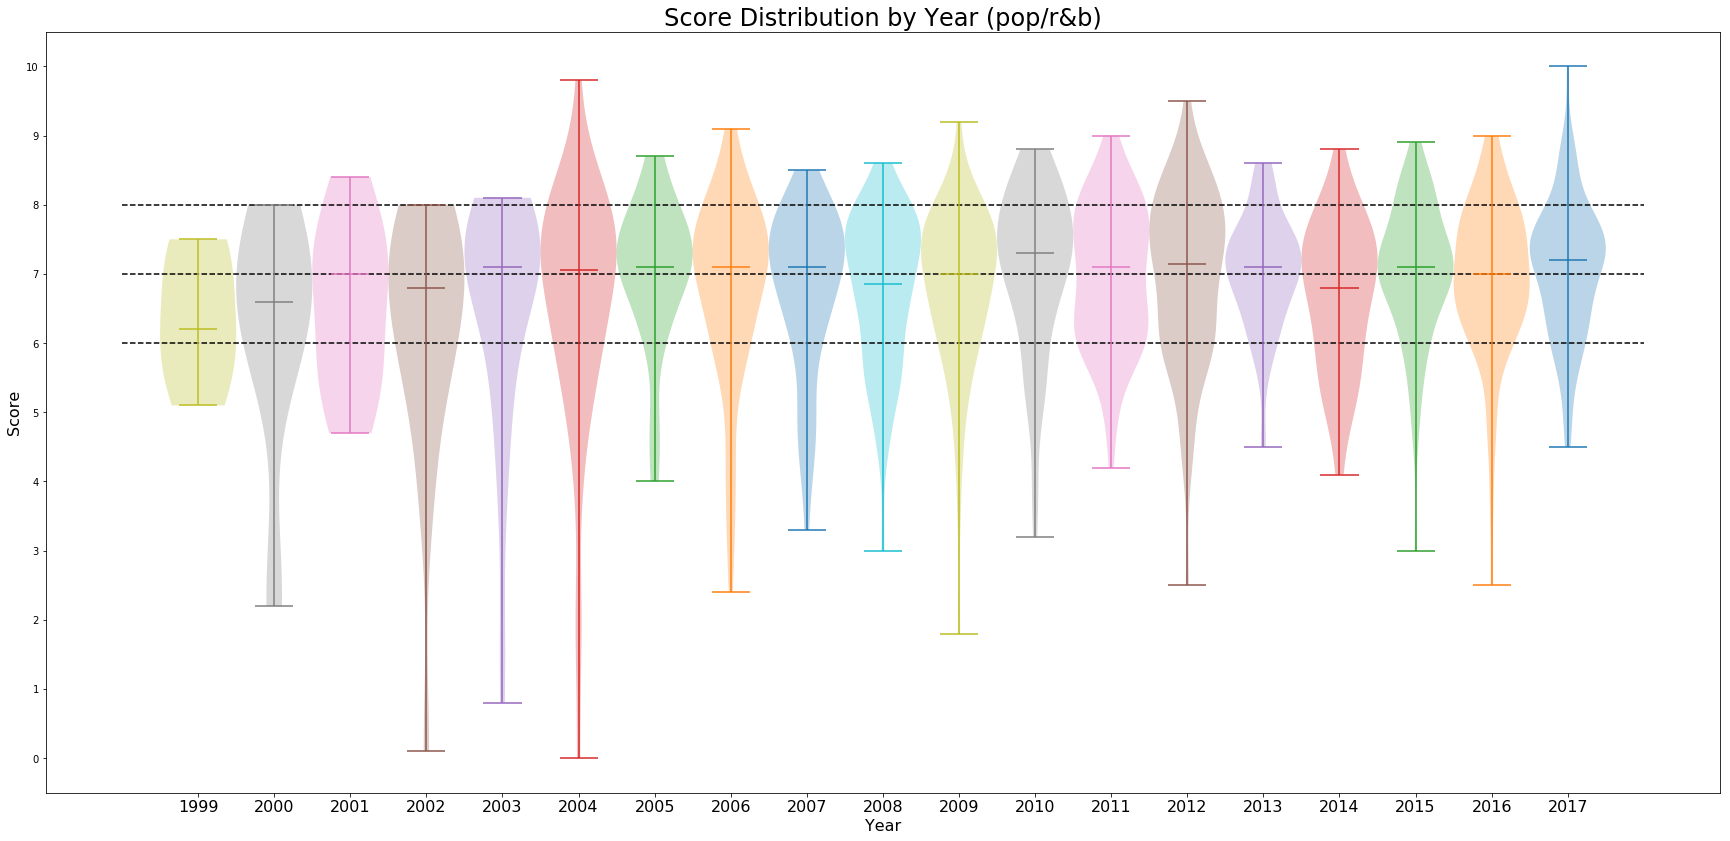

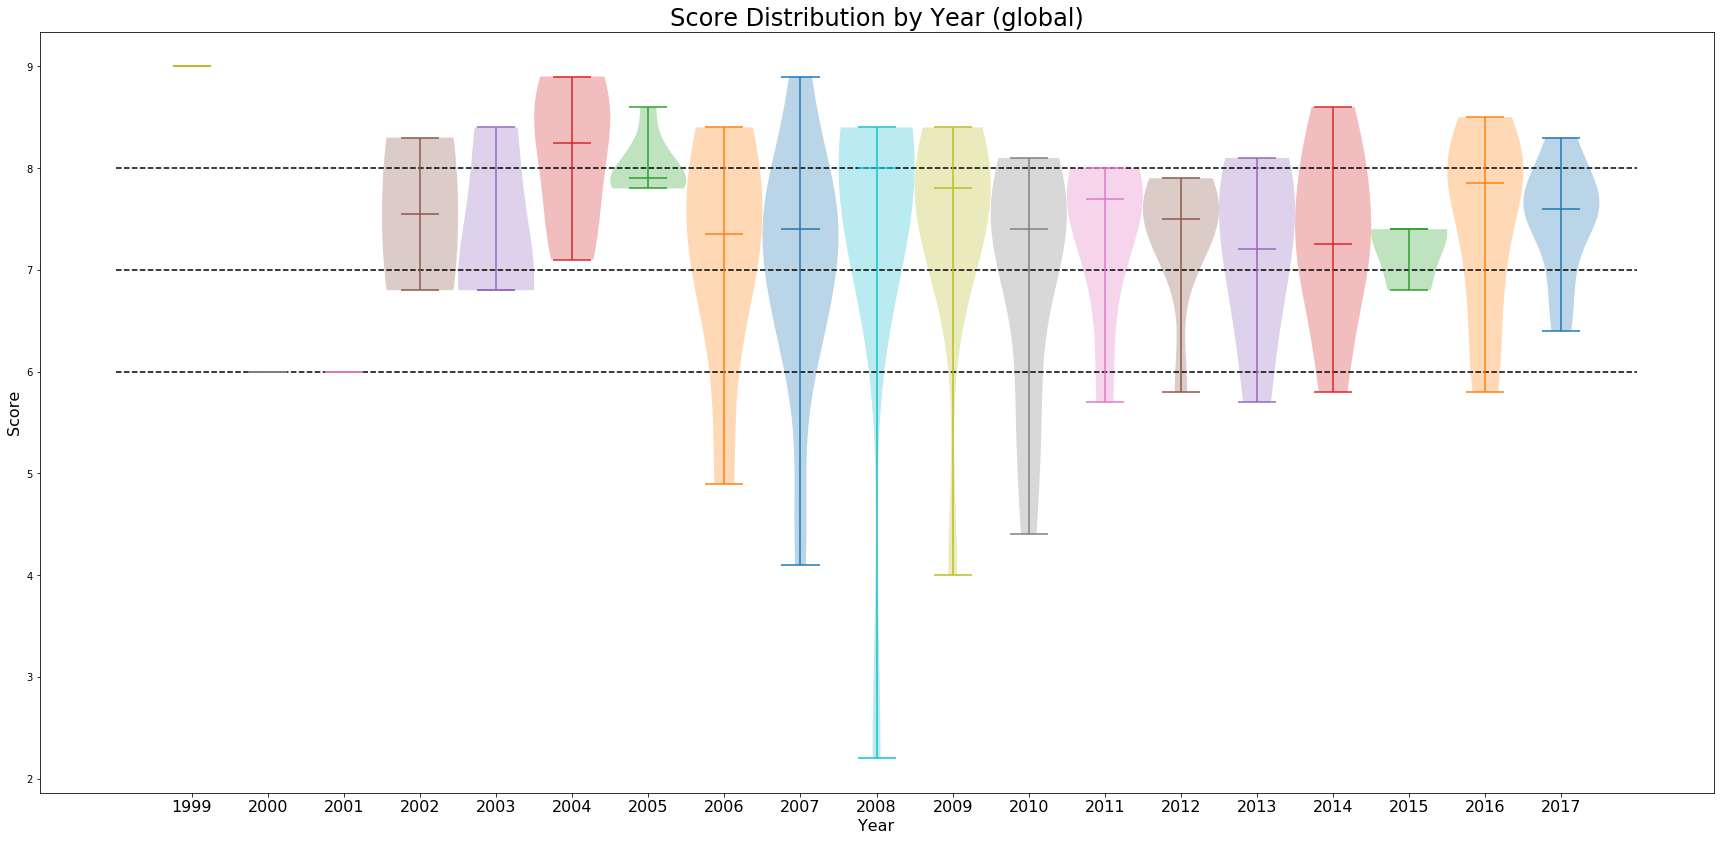

In [31]:
for each in genres:
    plot_violins(df[df['genre'] == each], each)

In [32]:
score_by_year = df.groupby('pub_year').agg(['mean', 'max','min','count','sum']).reset_index()

In [33]:
score_by_year['percent_bnm'] = score_by_year['best_new_music']['sum'] / score_by_year['score']['count']

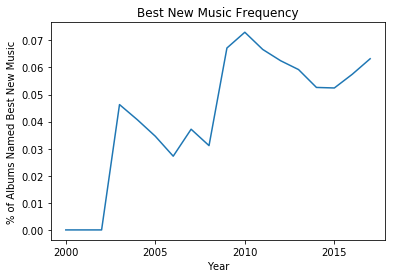

In [37]:
plt.plot(score_by_year['pub_year'][1:19], score_by_year['percent_bnm'][1:19])
plt.title('Best New Music Frequency')
plt.xticks([2000, 2005, 2010, 2015])
plt.xlabel('Year')
plt.ylabel('% of Albums Named Best New Music')
plt.show()

In [38]:
score_by_artist = df.groupby('artist').agg(['mean', 'max','min','count'])['score'].reset_index()

In [39]:
score_by_artist_filtered = score_by_artist[score_by_artist['count'] > 3]

In [40]:
score_by_artist_filtered.sort_values('mean',ascending=False)

,artist,mean,max,min,count
2851,gas,9.125000,9.5,8.8,4
8018,the velvet underground,9.050000,9.4,8.5,4
4046,kendrick lamar,8.920000,9.5,8.0,5
7896,the replacements,8.900000,9.4,8.7,4
2649,fleet foxes,8.800000,9.0,8.7,4
6831,sleater-kinney,8.766667,9.2,8.3,6
3789,joanna newsom,8.760000,9.4,8.0,5
1154,caetano veloso,8.700000,9.0,8.1,4
8445,vampire weekend,8.675000,9.3,8.0,4
7481,the clash,8.675000,10.0,7.7,4
